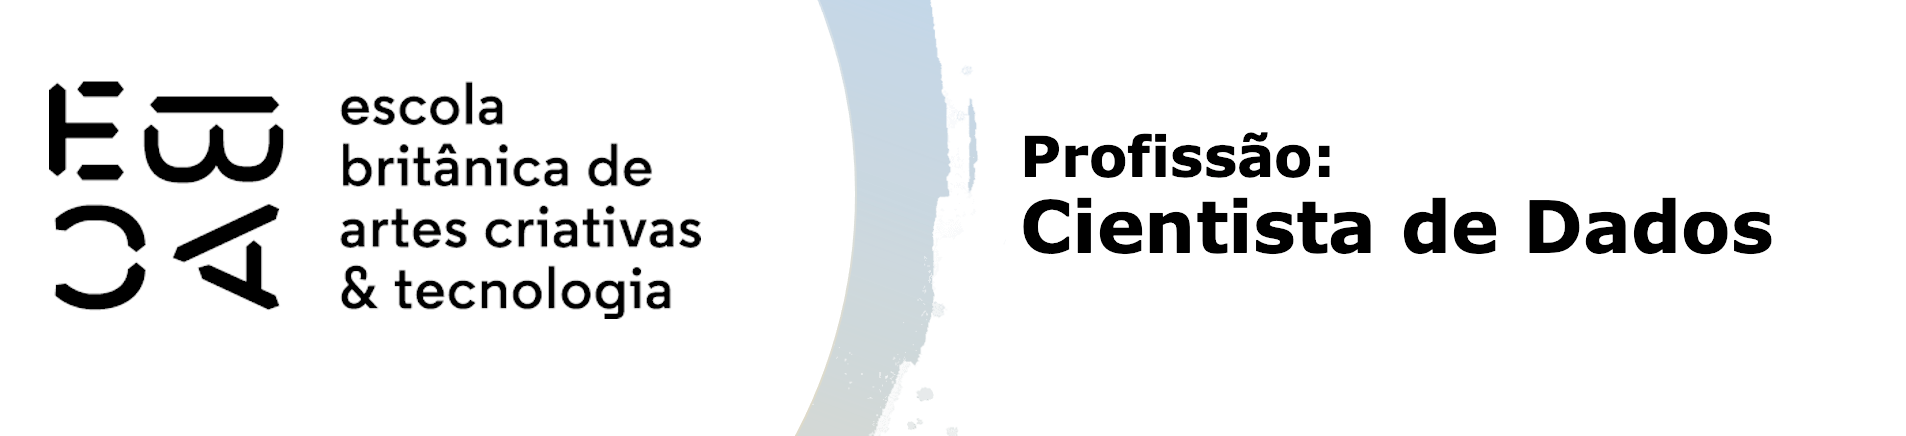

# Métodos hierárquicos de agrupamento - Tarefa

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes

In [2]:
peng = sns.load_dataset('penguins')
df = peng.select_dtypes('number').dropna()

df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


3. Padronize as variáveis para média zero e desvio padrão 1

In [3]:
df_pad = StandardScaler().fit_transform(df)
df_pad[:5]

array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234],
       [-1.32473679,  1.08972369, -0.56371522, -0.93877623],
       [-0.84781224,  1.74898502, -0.77737308, -0.68902013]])

4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos

In [4]:
matr_dist = shc.linkage(df_pad, method='complete')
matr_dist[:5]

array([[2.25000000e+02, 3.11000000e+02, 1.08991018e-01, 2.00000000e+00],
       [2.60000000e+02, 3.12000000e+02, 1.08991018e-01, 2.00000000e+00],
       [3.50000000e+01, 1.06000000e+02, 1.26537458e-01, 2.00000000e+00],
       [2.66000000e+02, 3.02000000e+02, 1.31843434e-01, 2.00000000e+00],
       [7.50000000e+01, 1.42000000e+02, 1.32965177e-01, 2.00000000e+00]])

5. Faça o Dendrograma

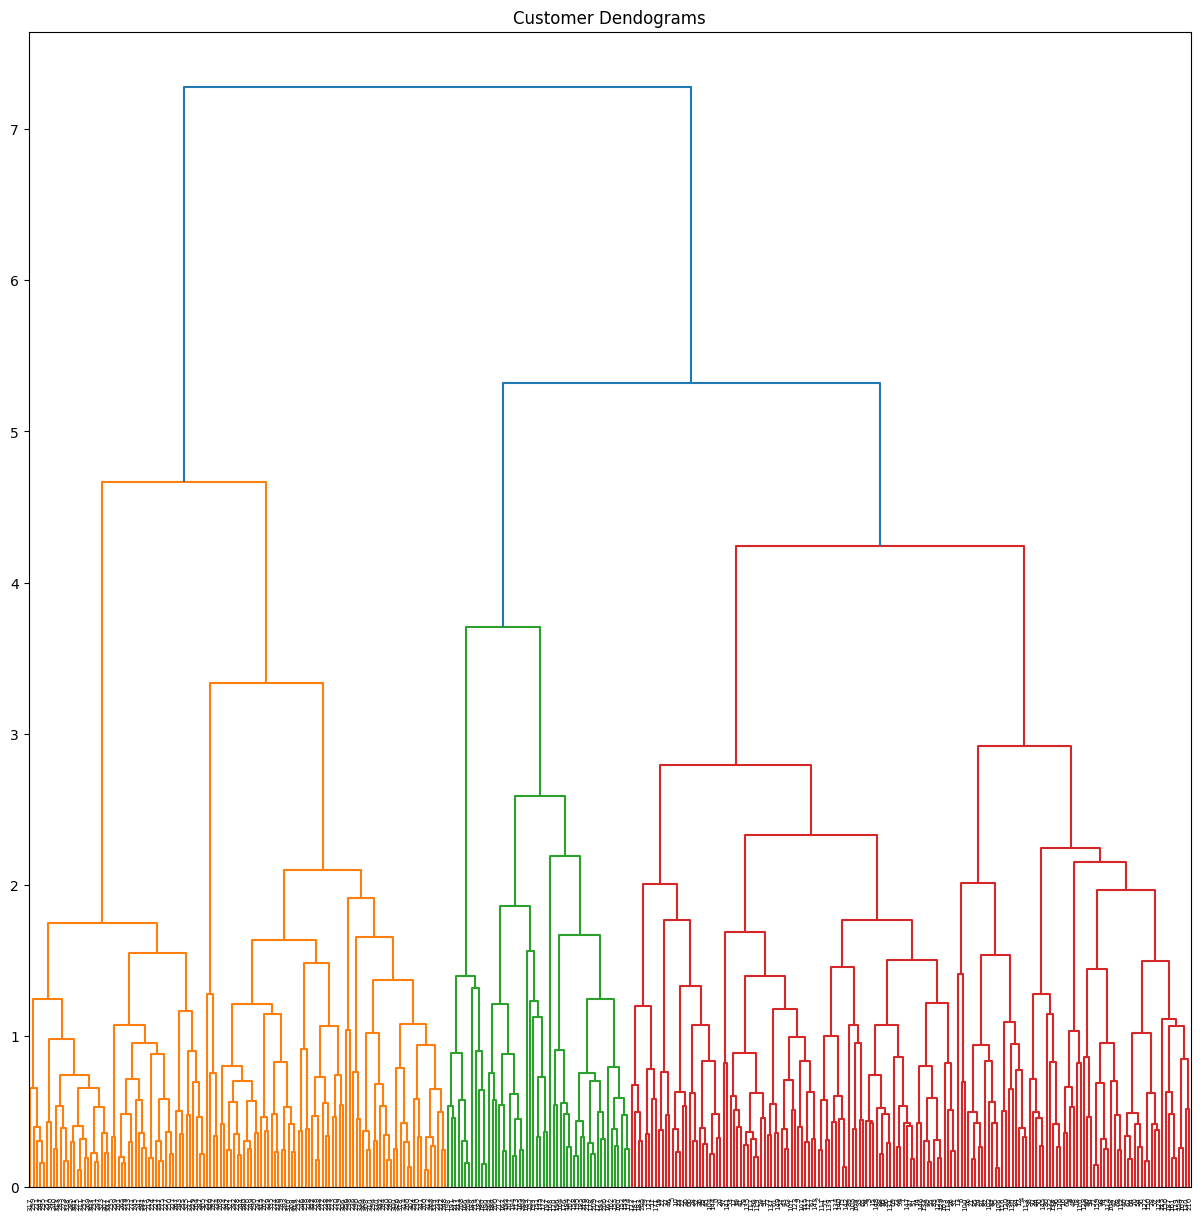

In [5]:
plt.figure(figsize=(15, 15))

plt.title("Customer Dendograms")

dend = shc.dendrogram(matr_dist)

## 2) Avalie os grupos

Descreva os grupos:

In [6]:
# Verificando quantos clusters foram obtidos
t = 5.0
clusters = fcluster(matr_dist, t=t, criterion='distance')
np.unique(clusters)

array([1, 2, 3], dtype=int32)

In [7]:
# Inserindo o nome id no index da DataFrame peng
peng.index.name='id'
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
id,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [8]:
# Inserindo o nome id no index da DataFrame peng
df.index.name='id'

# Inserindo os clusters
df['cluster'] = clusters
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster
id,,,,,
0,39.1,18.7,181.0,3750.0,3
1,39.5,17.4,186.0,3800.0,3
2,40.3,18.0,195.0,3250.0,3
4,36.7,19.3,193.0,3450.0,3
5,39.3,20.6,190.0,3650.0,3


In [9]:
# Inserindo os dados de cluster na DataFrame peng
peng = peng.merge(df['cluster'], how='left', on='id')
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,3.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,3.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,3.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,3.0


d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\OneDrive\Program\01 - sc

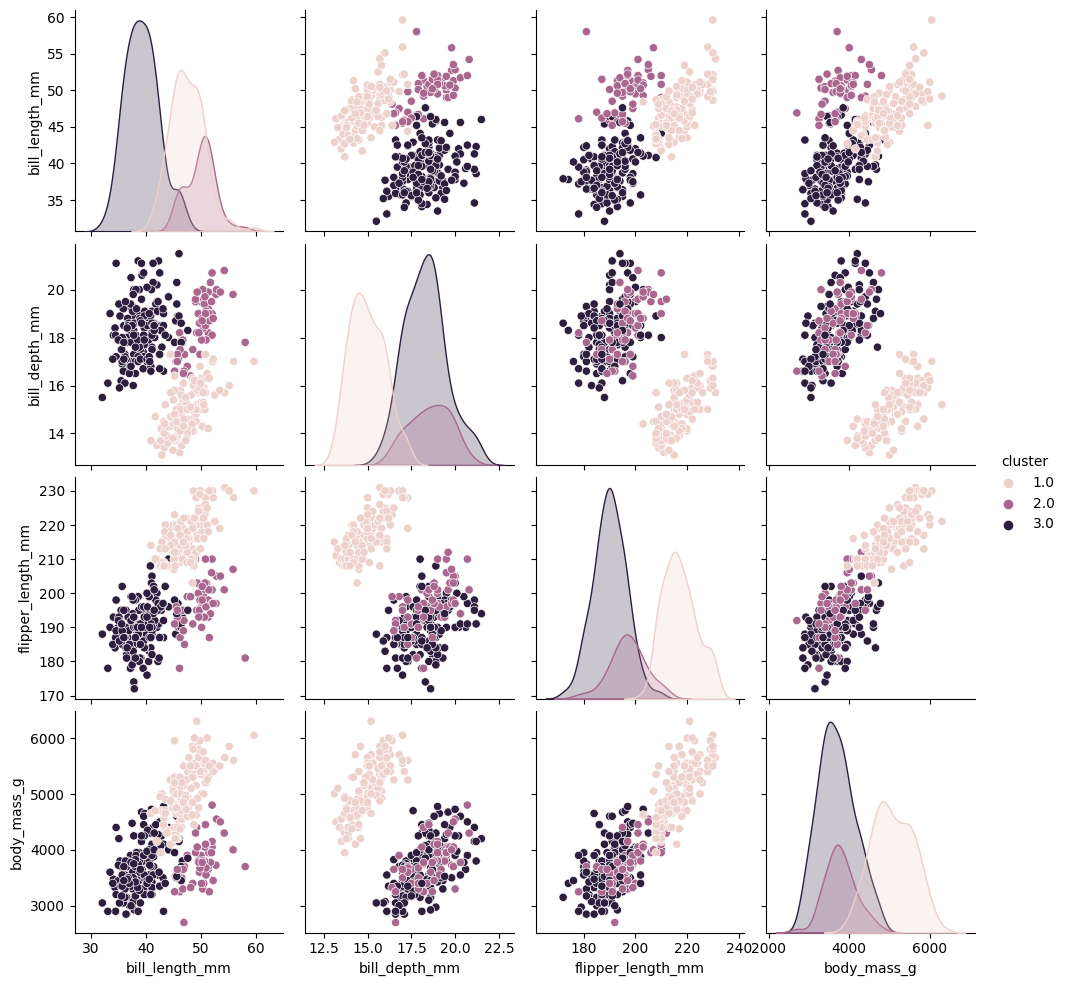

In [10]:
# Verificando os clusters
sns.pairplot(data=peng, hue='cluster')

- Quantos pinguins de cada espécie há em cada grupo?

In [11]:
pd.crosstab(peng['species'], peng['cluster'])

cluster,1.0,2.0,3.0
species,,,
Adelie,0,0,151
Chinstrap,0,54,14
Gentoo,123,0,0


- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [12]:
peng.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'cluster'],
      dtype='object')

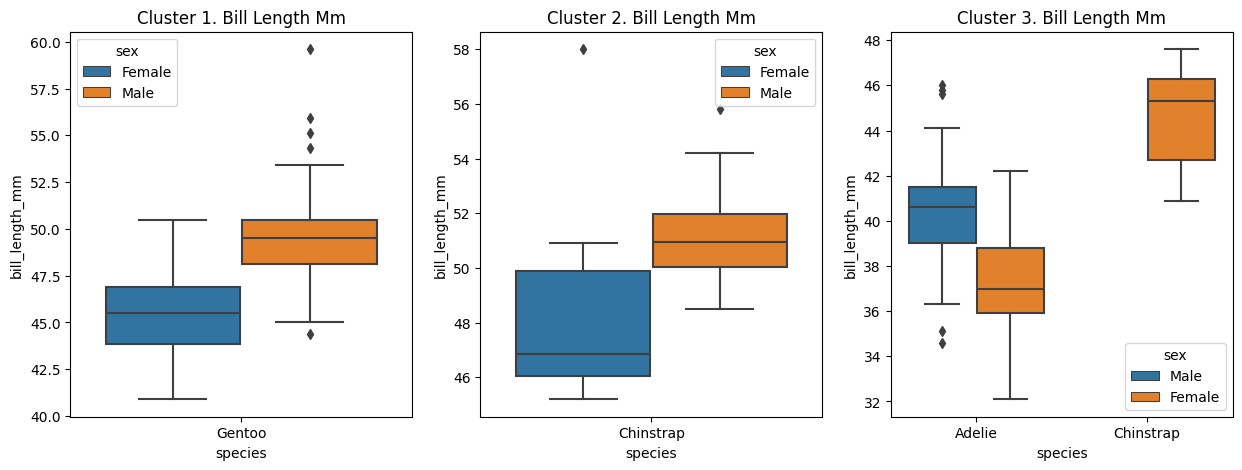

In [13]:
c = 2
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
g = sns.boxplot(
    x=peng.columns[0],
    y=peng.columns[c],
    hue=peng.columns[-2],
    data=peng[peng['cluster'] == 1.0],
    ax=ax[0]
)
g.set(
    title=f"Cluster 1. {peng.columns[c].replace('_', ' ').title()}"
)
h = sns.boxplot(
    x=peng.columns[0],
    y=peng.columns[c],
    hue=peng.columns[-2],
    data=peng[peng['cluster'] == 2.0],
    ax=ax[1]
)
h.set(
    title=f"Cluster 2. {peng.columns[c].replace('_', ' ').title()}"
)
i = sns.boxplot(
    x=peng.columns[0],
    y=peng.columns[c],
    hue=peng.columns[-2],
    data=peng[peng['cluster'] == 3.0],
    ax=ax[2]
)
i.set(
    title=f"Cluster 3. {peng.columns[c].replace('_', ' ').title()}"
)
plt.show()

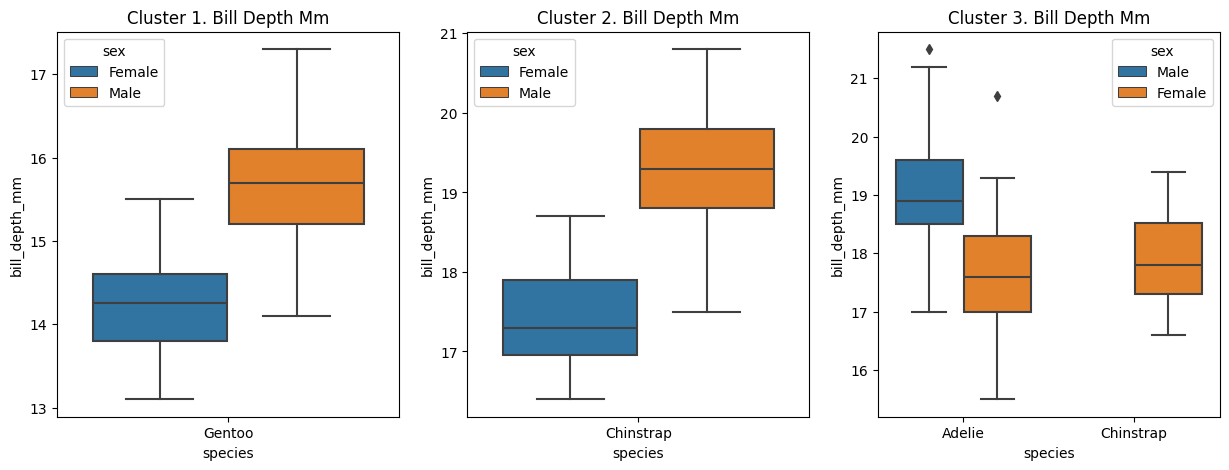

In [14]:
c += 1
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
g = sns.boxplot(
    x=peng.columns[0],
    y=peng.columns[c],
    hue=peng.columns[-2],
    data=peng[peng['cluster'] == 1.0],
    ax=ax[0]
)
g.set(
    title=f"Cluster 1. {peng.columns[c].replace('_', ' ').title()}"
)
h = sns.boxplot(
    x=peng.columns[0],
    y=peng.columns[c],
    hue=peng.columns[-2],
    data=peng[peng['cluster'] == 2.0],
    ax=ax[1]
)
h.set(
    title=f"Cluster 2. {peng.columns[c].replace('_', ' ').title()}"
)
i = sns.boxplot(
    x=peng.columns[0],
    y=peng.columns[c],
    hue=peng.columns[-2],
    data=peng[peng['cluster'] == 3.0],
    ax=ax[2]
)
i.set(
    title=f"Cluster 3. {peng.columns[c].replace('_', ' ').title()}"
)
plt.show()

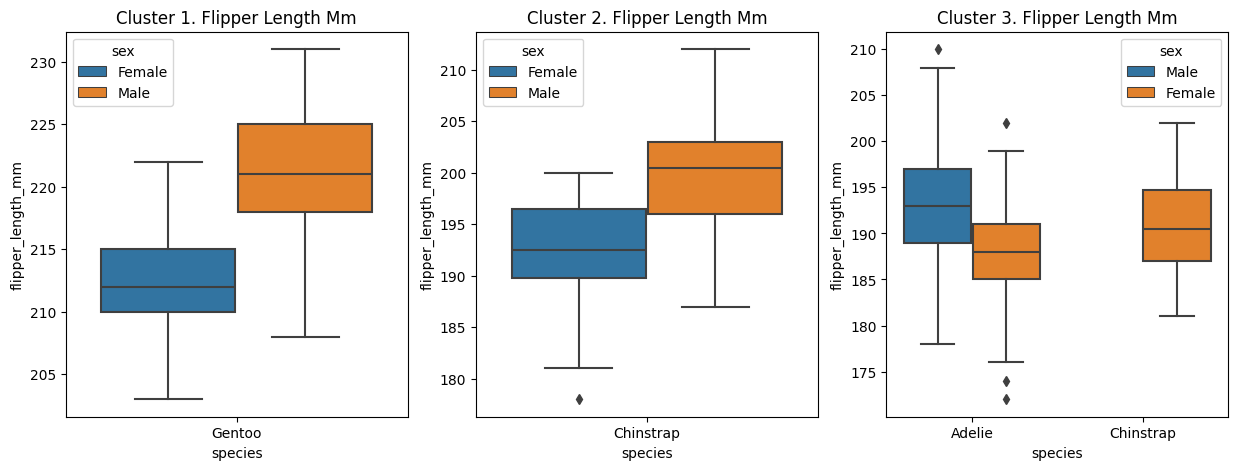

In [15]:
c += 1
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
g = sns.boxplot(
    x=peng.columns[0],
    y=peng.columns[c],
    hue=peng.columns[-2],
    data=peng[peng['cluster'] == 1.0],
    ax=ax[0]
)
g.set(
    title=f"Cluster 1. {peng.columns[c].replace('_', ' ').title()}"
)
h = sns.boxplot(
    x=peng.columns[0],
    y=peng.columns[c],
    hue=peng.columns[-2],
    data=peng[peng['cluster'] == 2.0],
    ax=ax[1]
)
h.set(
    title=f"Cluster 2. {peng.columns[c].replace('_', ' ').title()}"
)
i = sns.boxplot(
    x=peng.columns[0],
    y=peng.columns[c],
    hue=peng.columns[-2],
    data=peng[peng['cluster'] == 3.0],
    ax=ax[2]
)
i.set(
    title=f"Cluster 3. {peng.columns[c].replace('_', ' ').title()}"
)
plt.show()

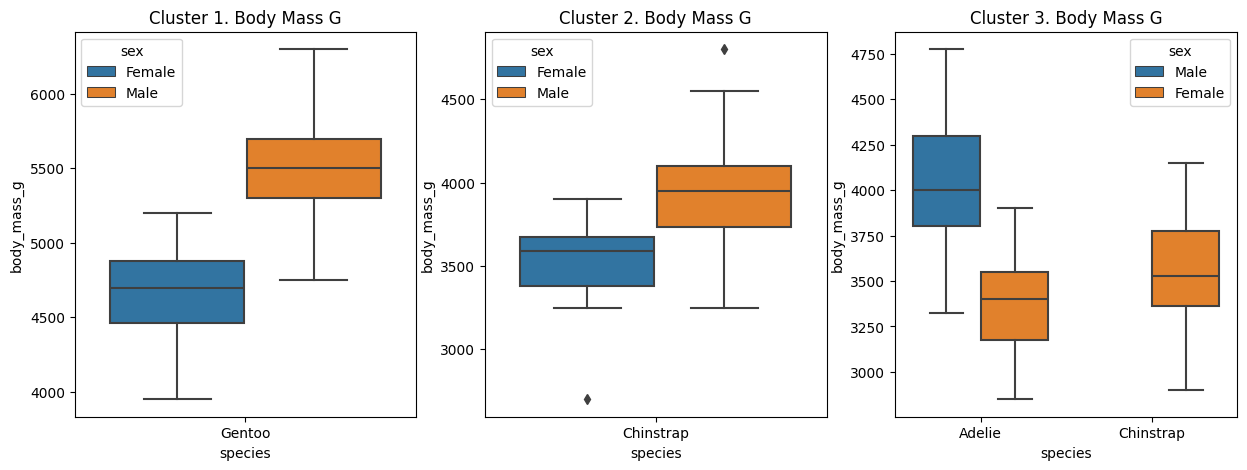

In [16]:
c += 1
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
g = sns.boxplot(
    x=peng.columns[0],
    y=peng.columns[c],
    hue=peng.columns[-2],
    data=peng[peng['cluster'] == 1.0],
    ax=ax[0]
)
g.set(
    title=f"Cluster 1. {peng.columns[c].replace('_', ' ').title()}"
)
h = sns.boxplot(
    x=peng.columns[0],
    y=peng.columns[c],
    hue=peng.columns[-2],
    data=peng[peng['cluster'] == 2.0],
    ax=ax[1]
)
h.set(
    title=f"Cluster 2. {peng.columns[c].replace('_', ' ').title()}"
)
i = sns.boxplot(
    x=peng.columns[0],
    y=peng.columns[c],
    hue=peng.columns[-2],
    data=peng[peng['cluster'] == 3.0],
    ax=ax[2]
)
i.set(
    title=f"Cluster 3. {peng.columns[c].replace('_', ' ').title()}"
)
plt.show()

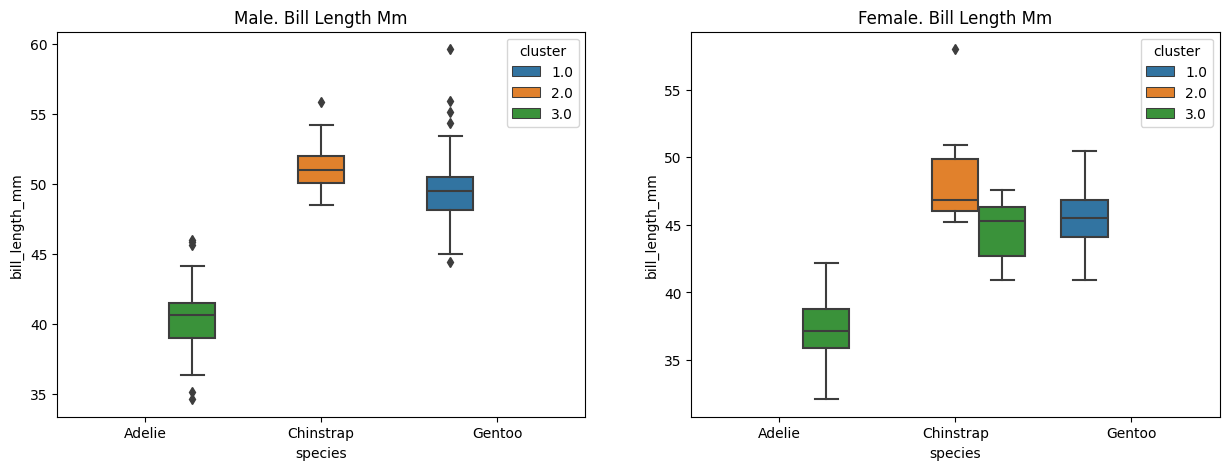

In [17]:
c = 2
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
g = sns.boxplot(
    x=peng.columns[0],
    y=peng.columns[c],
    hue=peng.columns[-1],
    data=peng[peng['sex'] == 'Male'],
    ax=ax[0]
)
g.set(
    title=f"Male. {peng.columns[c].replace('_', ' ').title()}"
)
h = sns.boxplot(
    x=peng.columns[0],
    y=peng.columns[c],
    hue=peng.columns[-1],
    data=peng[peng['sex'] != 'Male'],
    ax=ax[1]
)
h.set(
    title=f"Female. {peng.columns[c].replace('_', ' ').title()}"
)
plt.show()

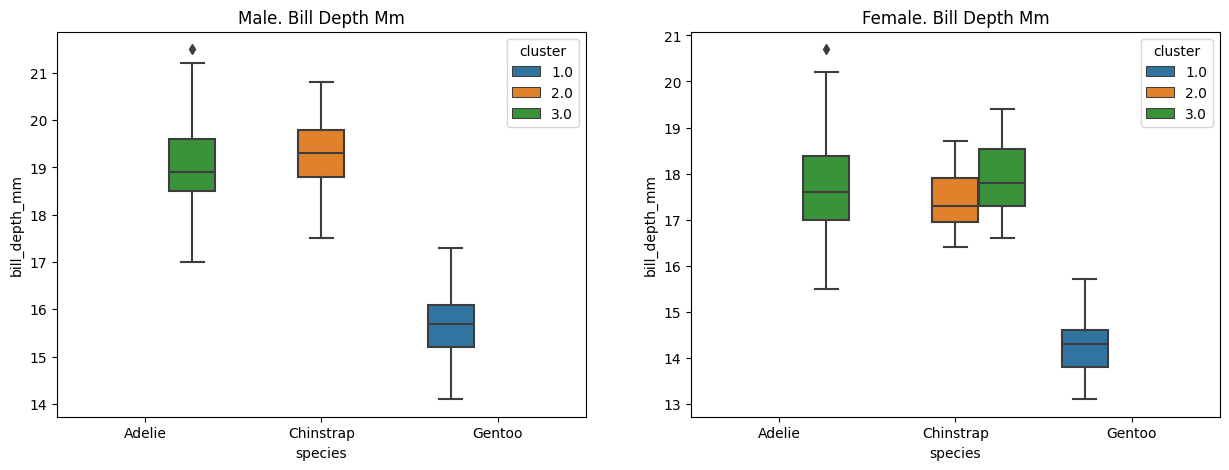

In [18]:
c += 1
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
g = sns.boxplot(
    x=peng.columns[0],
    y=peng.columns[c],
    hue=peng.columns[-1],
    data=peng[peng['sex'] == 'Male'],
    ax=ax[0]
)
g.set(
    title=f"Male. {peng.columns[c].replace('_', ' ').title()}"
)
h = sns.boxplot(
    x=peng.columns[0],
    y=peng.columns[c],
    hue=peng.columns[-1],
    data=peng[peng['sex'] != 'Male'],
    ax=ax[1]
)
h.set(
    title=f"Female. {peng.columns[c].replace('_', ' ').title()}"
)
plt.show()

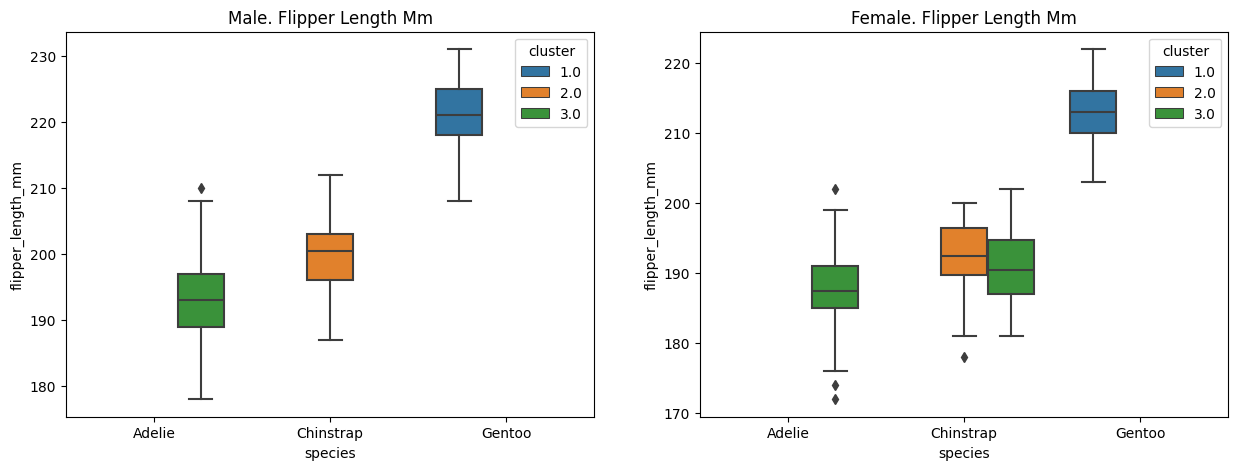

In [19]:
c += 1
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
g = sns.boxplot(
    x=peng.columns[0],
    y=peng.columns[c],
    hue=peng.columns[-1],
    data=peng[peng['sex'] == 'Male'],
    ax=ax[0]
)
g.set(
    title=f"Male. {peng.columns[c].replace('_', ' ').title()}"
)
h = sns.boxplot(
    x=peng.columns[0],
    y=peng.columns[c],
    hue=peng.columns[-1],
    data=peng[peng['sex'] != 'Male'],
    ax=ax[1]
)
h.set(
    title=f"Female. {peng.columns[c].replace('_', ' ').title()}"
)
plt.show()

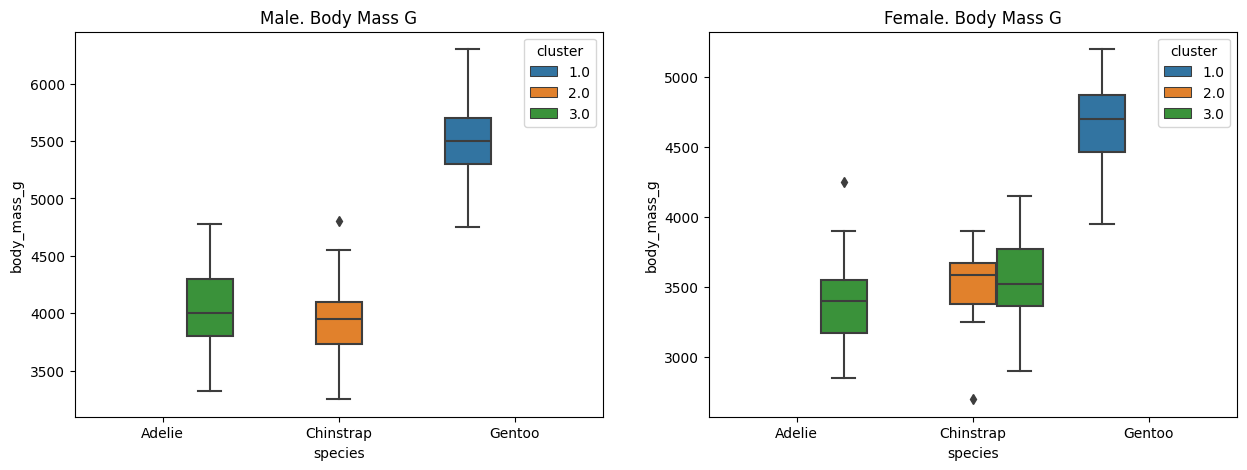

In [20]:
c += 1
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
g = sns.boxplot(
    x=peng.columns[0],
    y=peng.columns[c],
    hue=peng.columns[-1],
    data=peng[peng['sex'] == 'Male'],
    ax=ax[0]
)
g.set(
    title=f"Male. {peng.columns[c].replace('_', ' ').title()}"
)
h = sns.boxplot(
    x=peng.columns[0],
    y=peng.columns[c],
    hue=peng.columns[-1],
    data=peng[peng['sex'] != 'Male'],
    ax=ax[1]
)
h.set(
    title=f"Female. {peng.columns[c].replace('_', ' ').title()}"
)
plt.show()

## Conclusão

Usando 3 grupos, os agrupamentos são enriquecidos.
Aparentemente o sexo influência nos agrupamentos.

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [21]:
# Verificando quantos clusters foram obtidos
t = 3.5
clusters = fcluster(matr_dist, t=t, criterion='distance')
np.unique(clusters)

array([1, 2, 3, 4, 5, 6], dtype=int32)

In [22]:
peng = sns.load_dataset('penguins')
df = peng.select_dtypes('number').dropna()

df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [23]:
# Inserindo o nome id no index da DataFrame peng
df.index.name='id'

# Inserindo os clusters
df['cluster'] = clusters
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster
id,,,,,
0,39.1,18.7,181.0,3750.0,5
1,39.5,17.4,186.0,3800.0,5
2,40.3,18.0,195.0,3250.0,5
4,36.7,19.3,193.0,3450.0,5
5,39.3,20.6,190.0,3650.0,6


In [25]:
# Inserindo o nome id no index da DataFrame peng
peng.index.name='id'
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
id,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [26]:
# Inserindo os dados de cluster na DataFrame peng
peng = peng.merge(df['cluster'], how='left', on='id')
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,5.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,5.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,5.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,5.0


d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\OneDrive\Program\01 - scripts-base\EBAC\ebac_env\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\OneDrive\Program\01 - sc

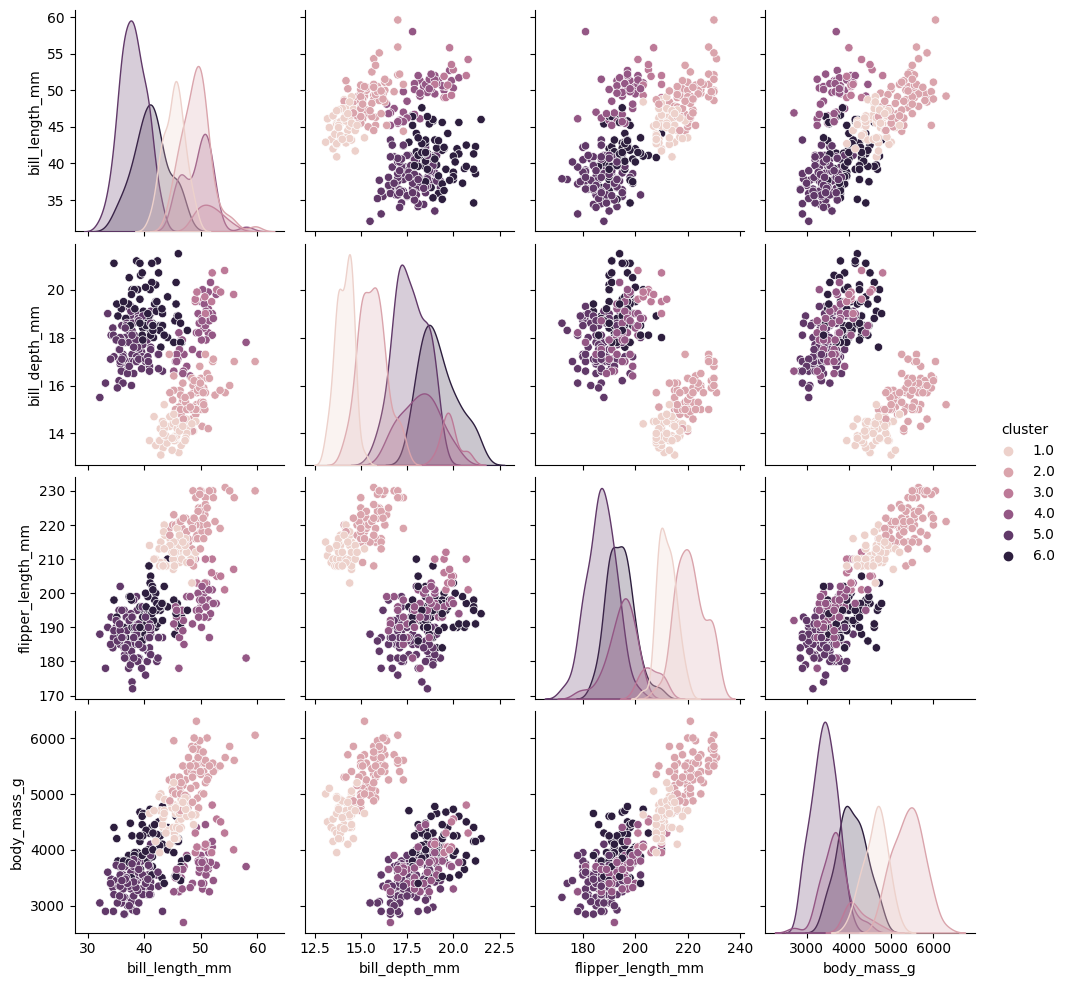

In [27]:
# Verificando os clusters
sns.pairplot(data=peng, hue='cluster')

- Quantos pinguins de cada espécie há em cada grupo?

In [28]:
pd.crosstab(peng['species'], peng['cluster'])

cluster,1.0,2.0,3.0,4.0,5.0,6.0
species,,,,,,
Adelie,0,0,0,0,91,60
Chinstrap,0,0,12,42,5,9
Gentoo,52,71,0,0,0,0


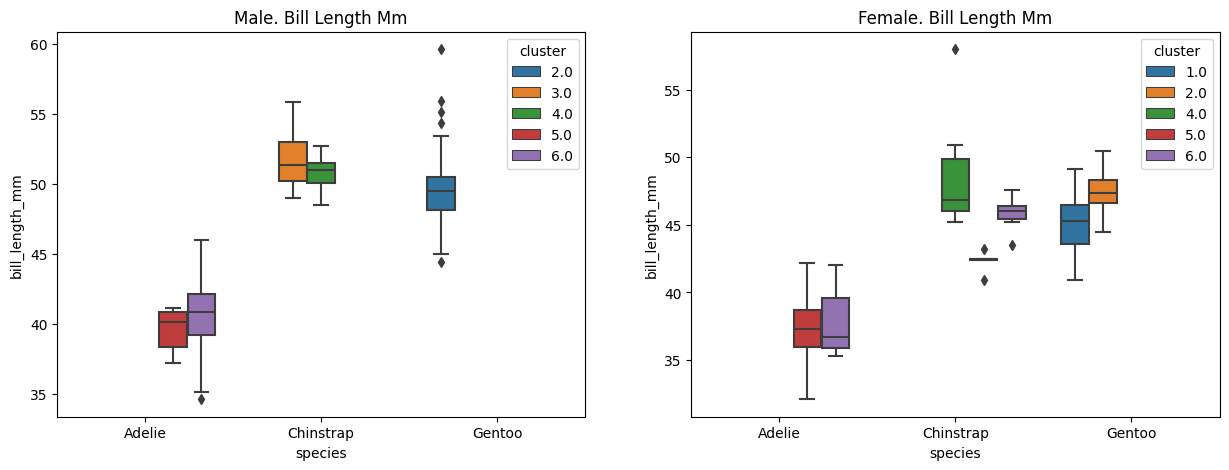

In [29]:
c = 2
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
g = sns.boxplot(
    x=peng.columns[0],
    y=peng.columns[c],
    hue=peng.columns[-1],
    data=peng[peng['sex'] == 'Male'],
    ax=ax[0]
)
g.set(
    title=f"Male. {peng.columns[c].replace('_', ' ').title()}"
)
h = sns.boxplot(
    x=peng.columns[0],
    y=peng.columns[c],
    hue=peng.columns[-1],
    data=peng[peng['sex'] != 'Male'],
    ax=ax[1]
)
h.set(
    title=f"Female. {peng.columns[c].replace('_', ' ').title()}"
)
plt.show()

In [ ]:
peng.groupby(['species', 'sex', "cluster"]).count()

island  bill_length_mm  bill_depth_mm  \
species   sex    cluster                                          
Adelie    Female 5.0          69              69             69   
                 6.0           4               4              4   
          Male   5.0          18              18             18   
                 6.0          55              55             55   
Chinstrap Female 4.0          20              20             20   
                 5.0           5               5              5   
                 6.0           9               9              9   
          Male   3.0          12              12             12   
                 4.0          22              22             22   
Gentoo    Female 1.0          49              49             49   
                 2.0           9               9              9   
          Male   2.0          61              61             61   

                          flipper_length_mm  body_mass_g  
species   sex    cluster                                  
Adelie    Female 5.0                     69           69  
                 6.0                      4            4  
          Male   5.0                     18           18  
                 6.0                     55           55  
Chinstrap Female 4.0                     20           20  
                 5.0                      5            5  
                 6.0                      9            9  
          Male   3.0                     12           12  
                 4.0                     22           22  
Gentoo    Female 1.0                     49           49  
                 2.0                      9            9  
          Male   2.0                     61           61

## Conclusão

Usando 6 grupos, os agrupamentos são enriquecidos, quando são suados 6 grupos, porque ocorre a diferenciação entre macho e femea, sendo que para essas espécies, as variáveis estão relacionadas com tamanho do animal, e por isso ocorre a influência nos agrupamentos.